In [ ]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

# Example: Sine Wave Reconstruction

In [ ]:
# Model Definition
class SineRNN(nn.Module):
  def __init__(self, p = 0.5):
    super(SineRNN, self).__init__()
    self.rnn_layer = nn.RNN(input_size = 1, hidden_size = 128)
    self.out_layer = nn.Linear(in_features = 128, out_features = 1)
    self.p = p #Whether to use actual seq or output for next step
    
  def forward(self,seq, h = None):
        out = []
        X_in = torch.unsqueeze(seq[0],0)
        for X in seq:
            if np.random.rand()>self.p: #Use teacher forcing
                X_in = X.unsqueeze(dim = 0)
            tmp, h = self.rnn_layer(X_in, h)
            X_in = self.out_layer(tmp)
            out.append(X_in)
        return torch.stack(out).squeeze(1), h

In [ ]:
seq = SineRNN()
criterion = nn.MSELoss()
optimizer = optim.Adam(seq.parameters(), lr=0.001)
max_iters = 10000
train_loss = []
for i in range(max_iters):
    data = np.sin(np.linspace(0,10,100)+2*np.pi*np.random.rand())
    xs = data[:-1]
    ys = data[1:]
    X = torch.Tensor(xs).view(-1,1,1)
    y = torch.Tensor(ys)
    if i%100==0:
        seq.p = min(seq.p+0.1,0.85)  # encourage training longer term predictions
    optimizer.zero_grad()
    rnn_out,_ = seq(X)
    loss = criterion(rnn_out[20:].view(-1),y[20:])
    loss.backward()
    optimizer.step()
    train_loss.append(loss.item())
    if i%500 == 0:
        print(f"i {i}, loss {loss.data:.4f}")

i 0, loss 0.4677
i 500, loss 0.3267
i 1000, loss 0.0526
i 1500, loss 0.0043
i 2000, loss 0.0039
i 2500, loss 0.0422
i 3000, loss 0.0014
i 3500, loss 0.0084
i 4000, loss 0.0093
i 4500, loss 0.0038
i 5000, loss 0.0039
i 5500, loss 0.0225
i 6000, loss 0.0066
i 6500, loss 0.0072
i 7000, loss 0.0011
i 7500, loss 0.0038
i 8000, loss 0.0107
i 8500, loss 0.0123
i 9000, loss 0.0030
i 9500, loss 0.0141


Validation Loss: 0.011890538968145847


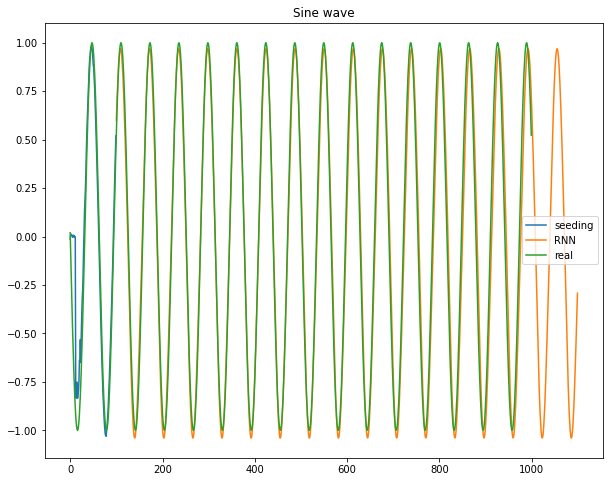

In [ ]:
from matplotlib import pyplot as plt

y = np.sin(np.linspace(0,100,1000)+2*np.pi*np.random.rand())
X = torch.Tensor(y)[:100].view(-1,1,1)
model_out,h = seq(X)
preds = []
pred = model_out[-1].view(1,1,1)
for i in range(1000):
    pred,h = seq(pred,h)
    preds.append(pred.data.numpy().ravel()[0])

plt.figure(figsize=[10,8])
xs = np.arange(model_out.size(0))
plt.plot(xs,model_out.data.numpy().ravel())
xs = np.arange(1000)+len(xs)
plt.plot(xs,preds)
plt.plot(y)
plt.legend(['seeding','RNN','real'])
plt.title('Sine wave')
val_loss = criterion(torch.Tensor(preds[:-100]), torch.Tensor(y[100:]))
print(f'Validation Loss: {val_loss}')

## Exercise: Cosine Generation

### Example generation of cosines with different amplitudes

Text(0.5, 1.0, 'Cosine: Random shifts and amplitudes')

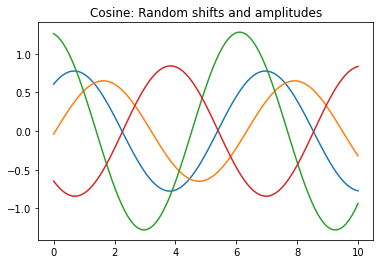

In [ ]:
f = plt.figure()
for i in range(4):
  x = np.linspace(0,10,100)+2*np.pi*np.random.rand()
  amp = np.random.rand()+0.5
  y = amp*np.cos(x)
  plt.plot(np.linspace(0,10,100), y)
plt.title('Cosine: Random shifts and amplitudes')

In [ ]:
#Set Hyperaparameters

#Generate Train, Val data


#Generate Test data